Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."


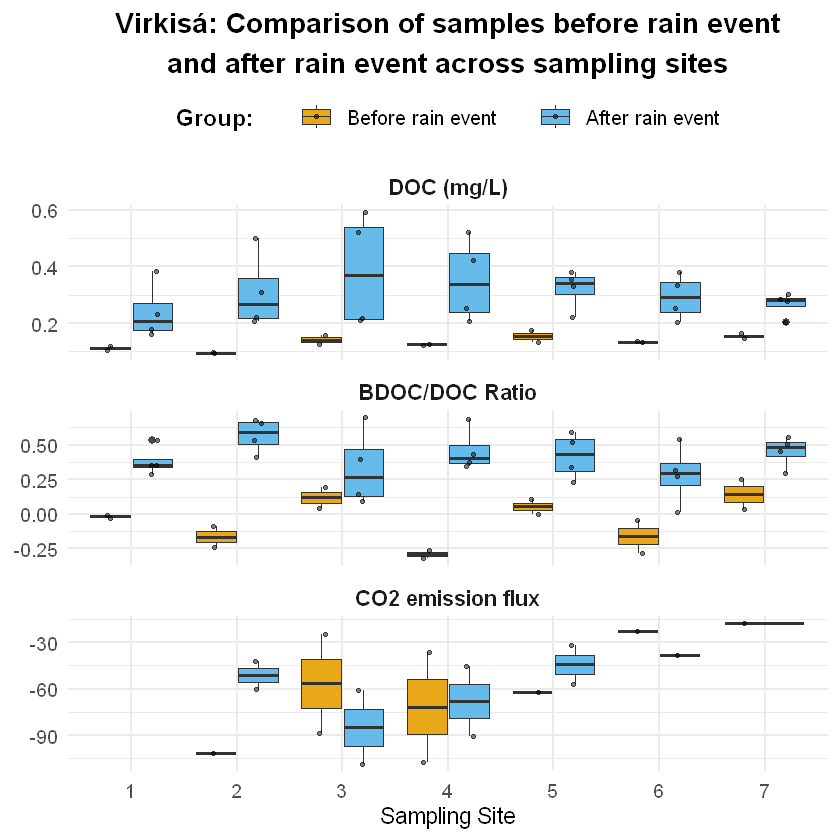

In [41]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readxl)

# Load data
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx", 
                 sheet = "FINAL_final_final")

# Farben
group_colors <- c("Before rain event     " = "#E69F00", "After rain event" = "#56B4E9")

# ----------------------------
# ✨ Hier kannst du die Facet-Titel ändern
facet_titles <- c(
  "average_DOC_sample" = "DOC (mg/L)",
  "BDOC_pct" = "BDOC/DOC Ratio",
  "CO2_Flux" = "CO2 emission flux"
)


#facet_titles <- c(
#  "average_DOC_sample" = "New DOC Title",
#  "BDOC_pct" = "New BDOC Title",
#  "CO2_Flux" = "New CO2 Title"
#)


# ----------------------------

# Data vorbereiten
df_virkisa <- df %>%
  filter(river_name == "Virkisa", site_nr != 8, !is.na(group_nr)) %>%
  pivot_longer(cols = c(average_DOC_sample, CO2_Flux, BDOC_pct),
               names_to = "Parameter", values_to = "Value") %>%
  mutate(
    Value = ifelse(Parameter == "BDOC_pct", Value / 100, Value),
    Parameter = facet_titles[Parameter],
    Group = factor(ifelse(group_nr == 1, "Before rain event     ", "After rain event"),
                   levels = c("Before rain event     ", "After rain event"))
  )

# Reihenfolge Facets festlegen
df_virkisa$Parameter <- factor(df_virkisa$Parameter,
                               levels = facet_titles)

# Plot
plot <- ggplot(df_virkisa, aes(x = as.factor(site_nr), y = Value, fill = Group)) +
  geom_boxplot(position = position_dodge(width = 0.8), alpha = 0.9,
               outlier.size = 2, outlier.shape = 16) +
  geom_jitter(position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.8),
              size = 1.2, alpha = 0.5) +
  facet_wrap(~Parameter, scales = "free_y", ncol = 1) +
  scale_fill_manual(values = group_colors) +
  labs(
    title = "Virkisá: Comparison of samples before rain event\nand after rain event across sampling sites",
    x = "Sampling Site", y = NULL, fill = "Group:     "
  ) +
  theme_minimal(base_size = 14) +
  theme(
    strip.text = element_text(face = "bold", size = 13),
    plot.title = element_text(hjust = 0.5, face = "bold", lineheight = 1.2),
    legend.position = "top",
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 12),
    legend.key.width = unit(0.8, "cm"),
    legend.spacing.x = unit(0.5, "cm")
  )

# 👉 In Jupyter anzeigen
print(plot)

# 👉 Als PNG speichern (Textbreite: 15 cm, Höhe: 22 cm)
ggsave("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Grouping_fluesse/Plot_Virkisa_finallegend.png",
       plot = plot, width = 15, height = 22, units = "cm", dpi = 300)


Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."


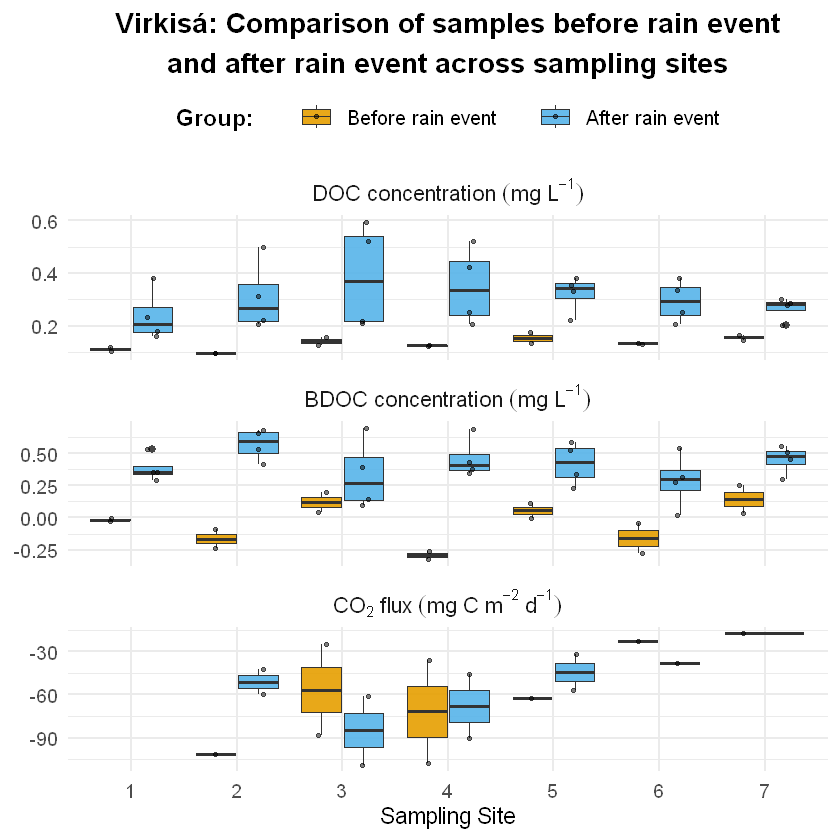

In [46]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readxl)

# Load data
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx", 
                 sheet = "FINAL_final_final")

# Farben
group_colors <- c("Before rain event     " = "#E69F00", "After rain event" = "#56B4E9")

# ----------------------------
# ✨ 🔎 HIER kannst du die Facet-Titel (Überschriften) ändern!
# Die Namen links müssen exakt den Original-Spaltennamen entsprechen:
# "average_DOC_sample", "BDOC_pct", "CO2_Flux"
#
# Rechts kannst du beliebigen Text schreiben, z. B. "DOC concentration", "BDOC", ...
# ----------------------------
facet_titles <- c(
  "average_DOC_sample" = "DOC",
  "BDOC_pct" = "BDOC",
  "CO2_Flux" = "CO2 flux"
)

# ----------------------------
# ✨ 🔎 HIER kannst du die Y-Achsenlabels ändern (mit Einheiten, hochgestellt usw.)
# Links MUSS identisch sein wie der Text aus facet_titles!
#
# Beispiel:
# y_labels <- c(
#   "DOC concentration" = "DOC~(mg~L^{-1})",
#   "Biodegradable DOC" = "BDOC~(mg~L^{-1})",
#   "CO2 emission flux" = "CO[2]~flux~(mg~C~m^{-2}~d^{-1})"
# )
# ----------------------------
y_labels <- c(
  "DOC" = "DOC~concentration~(mg~L^{-1})",
  "BDOC" = "BDOC~concentration~(mg~L^{-1})",
  "CO2 flux" = "CO[2]~flux~(mg~C~m^{-2}~d^{-1})"
)

# Data vorbereiten
df_virkisa <- df %>%
  filter(river_name == "Virkisa", site_nr != 8, !is.na(group_nr)) %>%
  pivot_longer(cols = c(average_DOC_sample, CO2_Flux, BDOC_pct),
               names_to = "Parameter", values_to = "Value") %>%
  mutate(
    Value = ifelse(Parameter == "BDOC_pct", Value / 100, Value),
    Parameter = facet_titles[Parameter],
    Group = factor(ifelse(group_nr == 1, "Before rain event     ", "After rain event"),
                   levels = c("Before rain event     ", "After rain event"))
  )

df_virkisa$Parameter <- factor(df_virkisa$Parameter,
                               levels = facet_titles)

# Plot
plot <- ggplot(df_virkisa, aes(x = as.factor(site_nr), y = Value, fill = Group)) +
  geom_boxplot(position = position_dodge(width = 0.8), alpha = 0.9,
               outlier.size = 2, outlier.shape = 16) +
  geom_jitter(position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.8),
              size = 1.2, alpha = 0.5) +
  facet_wrap(~Parameter, scales = "free_y", ncol = 1,
             labeller = as_labeller(y_labels, label_parsed)) +
  scale_fill_manual(values = group_colors) +
  labs(
    title = "Virkisá: Comparison of samples before rain event\nand after rain event across sampling sites",
    x = "Sampling Site", y = NULL, fill = "Group:     "
  ) +
  theme_minimal(base_size = 14) +
  theme(
    strip.text = element_text(face = "bold", size = 13),
    plot.title = element_text(hjust = 0.5, face = "bold", lineheight = 1.2),
    legend.position = "top",
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 12),
    legend.key.width = unit(0.8, "cm"),
    legend.spacing.x = unit(0.5, "cm")
  )

# 👉 In Jupyter anzeigen
print(plot)

# 👉 Als PNG speichern (Textbreite: 15 cm, Höhe: 22 cm)
ggsave("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Grouping_fluesse/Plot_Virkisa_finallegend.png",
       plot = plot, width = 15, height = 22, units = "cm", dpi = 300)
